First try to visualize the sorted data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import matplotlib as mpl
import glob


In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
data_path = "/home/haue/repositories/Masters/data/sorted/Al/"
outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
files = glob.glob(os.path.join(data_path, "*m.root"))


In [8]:
r = 0
dum = 0
Energies_id0 = []
Energies_id1 = []
Energies_id2 = []
Energies_id3 = []
Energies_id4 = []
Energies_id5 = []
Es = [Energies_id0, Energies_id1, Energies_id2, Energies_id3, Energies_id4,Energies_id5]

for f in files:
    r = uproot.open(f)["a101"]
    dum = r.arrays(["id", "FE", "BE"])
    ids = ak.flatten(dum.id)
    FEs = ak.flatten(dum.FE)
    BEs = ak.flatten(dum.BE)
    for (i, e) in zip(range(0, 6), Es) :
        mask = (ids == i)
        f_FEs = FEs[mask]
        f_BEs = BEs[mask]
        e.extend((f_FEs + f_BEs) /2)
    #print("file ", f, " processed")
    if f==files[-1]:
        print("Done!")


Done!


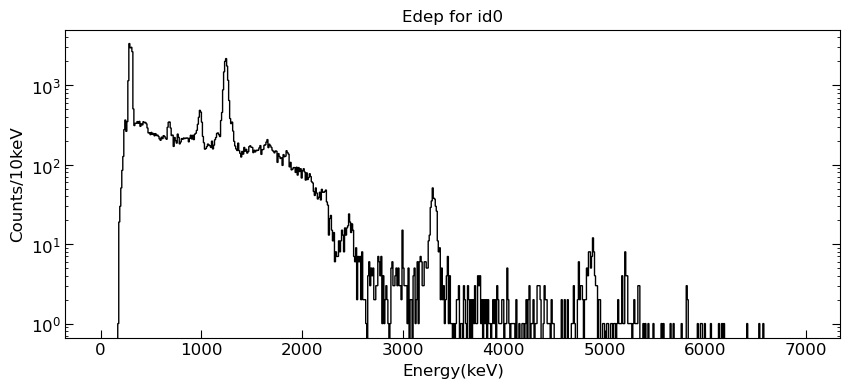

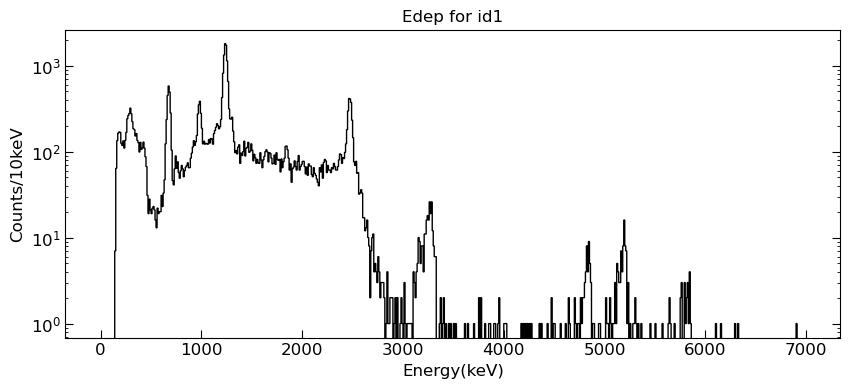

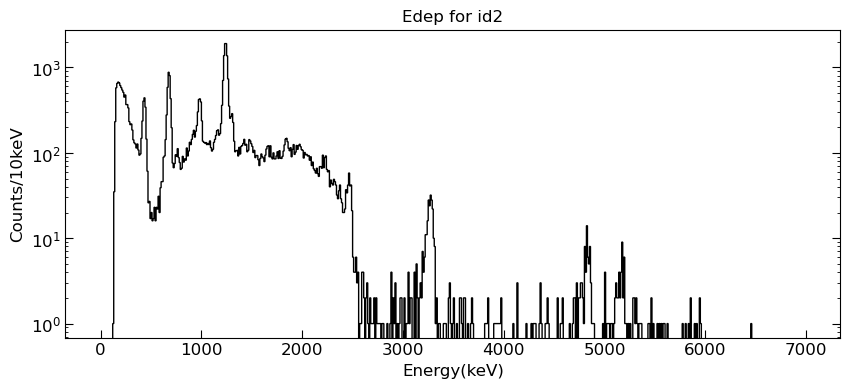

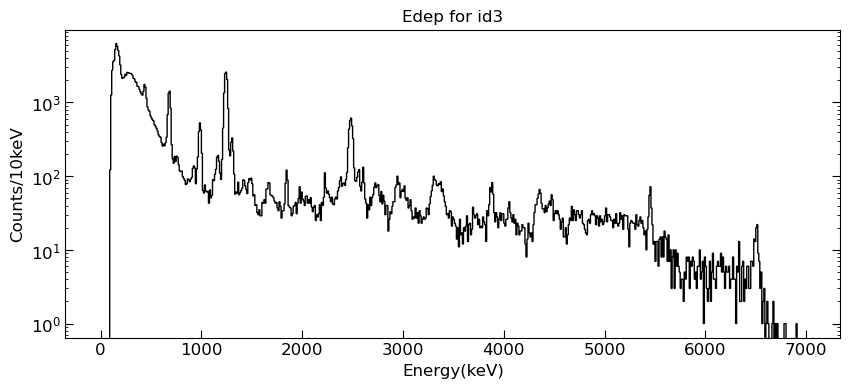

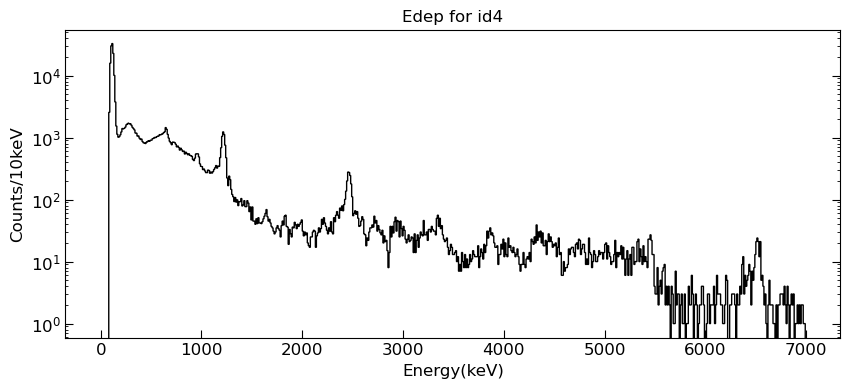

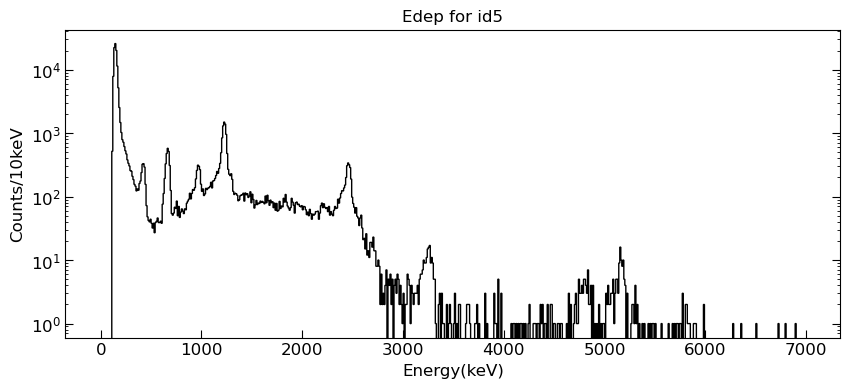

In [18]:
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12, top=False, direction="in")
plt.rc("xtick.major", size=6)
plt.rc("xtick.minor", size=3)
plt.rc("ytick", labelsize=12, right=True, direction="in")
plt.rc("ytick.major", size=6)
plt.rc("ytick.minor", size=2)
plt.rc("axes", titlesize=12)
plt.rc("legend", fontsize=14)


for i,e in zip(range(0,6),Es):
   plt.figure(figsize=(10,4))
   plt.hist(e, bins=np.arange(0,7000,10), histtype='step', color='k')
   plt.title(f"Edep for id{i}")
   plt.xlabel("Energy(keV)")
   plt.ylabel("Counts/10keV")
   plt.yscale('log')
   plt.show()